In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import plotly.express as px

In [2]:
timeDF = pd.read_csv('timeDF.csv')

In [87]:
train = timeDF.loc[timeDF.dataType == "train"]
test = timeDF.loc[timeDF.dataType == "test"]
val = timeDF.loc[timeDF.dataType == "val"]

In [4]:
Y_train = train.transactions
X_train = train.drop(['date', 'dataType', 'transactions', "Unnamed: 0"], axis = 1)

Y_test = test.transactions
X_test = test.drop(['date', 'dataType', 'transactions', "Unnamed: 0"], axis = 1)

X_val = val.drop(['date', 'dataType', 'transactions', "Unnamed: 0"], axis = 1)

In [74]:
#random forest

regr = RandomForestRegressor(max_depth=14, random_state=0, n_estimators = 10)
regr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=14, n_estimators=10, random_state=0)

In [75]:
print(regr.score(X_train, Y_train))
print(regr.score(X_test,Y_test))

0.9828583426264281
0.8942939123356239


In [ ]:
# max depth = 15, n_estimators = 100
#0.9877059400926113
#0.8966534542275739

# max dept = 10
#0.9545363726938487
#0.8831389284211973

In [76]:
pred = regr.predict(X_test)
results = pd.DataFrame(data = pred, columns=['prediction'])
results["groundTruth"] = Y_test.to_numpy()

<AxesSubplot:>

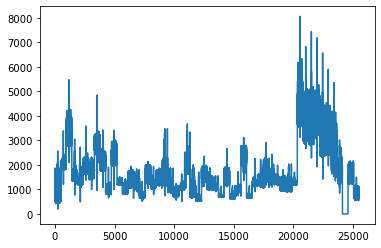

In [77]:
results.prediction.plot()

<AxesSubplot:>

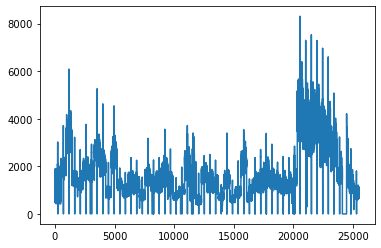

In [78]:
results.groundTruth.plot()

In [88]:
test['prediction'] = pred
test = test.drop(["Unnamed: 0", "index"], axis = 1)

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_18364/4255207595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = pred


In [96]:
storeIds = test.store_nbr.unique()
cache = []
for storeId in storeIds:
    storePred = test.loc[test.store_nbr == storeId]
    #print(storePred)
    fig = px.scatter(y = [storePred['transactions'], storePred['prediction']])
    fig.show()
    cache.append(storePred)

In [97]:
valPred = regr.predict(X_val)
val['transactionPredictions'] = valPred
val

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_18364/3551634384.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0        date  weekday  day  month  year dataType  dcoilwtico  \
1718         1718  2017-08-16        2   16      8  2017      val   46.800000   
1719         1719  2017-08-17        3   17      8  2017      val   47.070000   
1720         1720  2017-08-18        4   18      8  2017      val   48.590000   
1721         1721  2017-08-19        5   19      8  2017      val   48.190000   
1722         1722  2017-08-20        6   20      8  2017      val   47.790000   
...           ...         ...      ...  ...    ...   ...      ...         ...   
93631        1729  2017-08-27        6   27      8  2017      val   46.816667   
93632        1730  2017-08-28        0   28      8  2017      val   46.400000   
93633        1731  2017-08-29        1   29      8  2017      val   46.460000   
93634        1732  2017-08-30        2   30      8  2017      val   45.960000   
93635        1733  2017-08-31        3   31      8  2017      val   47.260000   

       type  locale  ...  store_nbr  transactions  city  state  citytype  \
1718      6       3  ...        1.0           0.0    18     12         3   
1719      6       3  ...        1.0           0.0    18     12         3   
1720      6       3  ...        1.0           0.0    18     12         3   
1721      6       3  ...        1.0           0.0    18     12         3   
1722      6       3  ...        1.0           0.0    18     12         3   
...     ...     ...  ...        ...           ...   ...    ...       ...   
93631     6       3  ...       54.0           0.0     5     10         2   
93632     6       3  ...       54.0           0.0     5     10         2   
93633     6       3  ...       54.0           0.0     5     10         2   
93634     6       3  ...       54.0           0.0     5     10         2   
93635     6       3  ...       54.0           0.0     5     10         2   

       cluster  holidayAtStoreState  holidayAtStoreCity  index  \
1718        13                    0                   0   1718   
1719        13                    0                   0   1719   
1720        13                    0                   0   1720   
1721        13                    0                   0   1721   
1722        13                    0                   0   1722   
...        ...                  ...                 ...    ...   
93631        3                    0                   0   1729   
93632        3                    0                   0   1730   
93633        3                    0                   0   1731   
93634        3                    0                   0   1732   
93635        3                    0                   0   1733   

       transactionPredictions  
1718              1806.629640  
1719              1747.754150  
1720              1799.033525  
1721              1353.679198  
1722               521.556510  
...                       ...  
93631             1105.813184  
93632              839.705147  
93633              813.204388  
93634              738.389637  
93635              738.389637  

[864 rows x 23 columns]

In [ ]:
val.to_csv('valDataSet_transactionPred_randomForrestAllStores
           ')